In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML,display

# EDA
### Explore data

In [3]:
raw_data = pd.read_csv('dataset/ultimateG.csv')
print ("Data Rows : " + str(raw_data.shape[0]))
print ("Data Cols : " + str(raw_data.shape[1]))
s = '<table> <tr><th>Column Name</th> <th>Data Type</th> <th>Number of Unique Value</th> <th>Unique Value</th> </tr>'
for col in list(raw_data):
    s += '<tr><td>' + col + '</td><td>' + str(raw_data[col].dtypes) + '</td><td>' + str(len(raw_data[col].unique())) + '</td><td>' 
    if str(raw_data[col].dtypes) == 'object':
        s += str(raw_data[col].unique())
    else:
        s += '...'
    s +='</td></tr>'
s += '</table>'
h = HTML(s)
display(h)

Data Rows : 9385
Data Cols : 52


In [3]:
raw_data['sum_G1'] = raw_data['G1141'] + raw_data['G1142']  + raw_data['G1143']  + raw_data['G1144']  + raw_data['G121']  + raw_data['G122'] + raw_data['G13'] + raw_data['G14'] + raw_data['G15'] + raw_data['G16']

In [4]:
raw_data['sum_G1']

0        1.34
1        7.46
2        9.50
3        3.16
4        1.84
5        4.67
6        3.51
7        6.34
8        0.90
9        3.51
10       3.50
11      68.75
12       5.39
13       9.34
14       6.00
15       4.42
16       5.28
17       0.00
18      11.50
19       7.50
20       7.00
21       4.00
22       9.25
23       0.00
24       1.75
25       9.25
26      10.25
27      10.02
28       2.00
29      10.50
        ...  
9355     9.60
9356     2.75
9357     6.07
9358     5.25
9359    25.66
9360     4.45
9361     0.00
9362     4.50
9363     9.50
9364     5.00
9365    11.25
9366    17.58
9367     2.67
9368     7.25
9369     4.68
9370     5.67
9371     4.55
9372     4.25
9373     0.00
9374     8.08
9375     0.00
9376    30.25
9377     3.22
9378     0.00
9379     0.00
9380     3.65
9381     3.50
9382     2.50
9383     8.51
9384     0.00
Name: sum_G1, Length: 9385, dtype: float64

In [5]:
raw_data['G1']

0       37.33
1       27.74
2       22.70
3       10.18
4       38.48
5       19.94
6       22.13
7       29.54
8        0.90
9       47.86
10      14.85
11      73.15
12       5.39
13      18.34
14      14.80
15      14.31
16       5.28
17      31.81
18      15.90
19      24.00
20      13.60
21       4.00
22      13.65
23       4.40
24      21.35
25      31.25
26      10.25
27      34.82
28      22.40
29      29.44
        ...  
9355    41.22
9356    17.95
9357    27.35
9358    22.01
9359    43.04
9360    16.45
9361     0.00
9362    17.10
9363    29.15
9364    16.29
9365    22.05
9366    46.42
9367     2.67
9368    32.55
9369    25.92
9370    23.56
9371     6.02
9372    15.05
9373     0.00
9374    24.00
9375     0.00
9376    50.38
9377     3.22
9378     3.20
9379     4.40
9380    14.60
9381    43.90
9382    30.90
9383    20.02
9384     4.40
Name: G1, Length: 9385, dtype: float64

# Preprocess

#### Delete row  nan,ลาศึกษาต่อ,บรรจุใหม่ Grade

In [6]:
data = raw_data.copy()
data = data[pd.notnull(data['GRADES'])]
data = data[data['GRADES'] != 'ลาศึกษาต่อ']
data = data[data['GRADES'] != 'บรรจุใหม่']
print ("Deleted %d rows"%(raw_data.shape[0]-data.shape[0]))
dat_g = data.copy()

Deleted 3478 rows


#### Delete
- YEAR 
- SEMESTER 
- EMPLOYEETYPECODE 
- LEVEL4 3 2 0 
- DEPARTMENTCODE_DEMO

In [7]:
del data['YEAR']
del data['SEMESTER']
del data['EMPLOYEETYPECODE']
del data['LEVEL4']
del data['LEVEL3']
del data['LEVEL2']
del data['level_0']
del data['DEPARTMENTCODE_DEMO']
del data['GRADES']

### Create Personal mean Function

In [8]:
def create_personal_mean(input_data):
    # Create dataframe of each person
    personal_data_list = [] # list of dataframe of each person 
    for employee_id in data['EMPLOYEEID_DEMO'].unique():
        personal_data_list.append(input_data[input_data['EMPLOYEEID_DEMO'] == employee_id].copy())
    # Find mean and sd of each column of each person
    mean_personal_data_list = []
    sd_personal_data_list = []
    for i in range(0,len(personal_data_list)):
        mean_personal_data_list.append(personal_data_list[i].mean())
        sd_personal_data_list.append(personal_data_list[i].std())
    return pd.DataFrame(mean_personal_data_list),pd.DataFrame(sd_personal_data_list)

### Create numuric_categorical_data 
(Data which contain numeric and categorical(POSITIONLEVEL,POSITIONTH,EMPLOYEETYPENAME) )
##### Dummy Data
extract categorical column to n unique values columns

In [9]:
def create_n_c_dat(data):
    n_c_dat = data.copy()
    del n_c_dat['EMPLOYEEID_DEMO']
    return pd.get_dummies(n_c_dat)

### Create numuric_categorical_personal_data

In [10]:
def create_n_c_p_dat(data): 
    n_c_dat = data.copy()
    n_c_dat = pd.get_dummies(n_c_dat)
    n_c_p_dat,temp = create_personal_mean(n_c_dat)
    del n_c_p_dat['EMPLOYEEID_DEMO']
    return n_c_p_dat

### Create numeric_data
(Data which contain only nemeric column)

In [11]:
def create_n_dat(data):
    n_dat = data.copy() 
    del n_dat['POSITIONTH']
    del n_dat['POSITIONLEVEL']
    del n_dat['EMPLOYEETYPENAME']
    del n_dat['EMPLOYEEID_DEMO']
    return n_dat

### Create numeric_personal_data
(Data which contain only nemeric column and each row is mean value of each person)

In [12]:
def create_n_p_dat(data):
    n_dat = data.copy() 
    del n_dat['POSITIONTH']
    del n_dat['POSITIONLEVEL']
    del n_dat['EMPLOYEETYPENAME']
    n_p_dat,temp =  create_personal_mean(n_dat)
    del n_p_dat['EMPLOYEEID_DEMO']
    return n_p_dat

In [13]:
n_c_dat = create_n_c_dat(data)
n_c_p_dat = create_n_c_p_dat(data)
n_dat = create_n_dat(data)
n_p_dat = create_n_p_dat(data)

### Create scale factor dataframe

In [14]:
min_n_c_dat = n_c_dat.min()
max_n_c_dat = n_c_dat.max()
min_n_c_p_dat = n_c_p_dat.min()
max_n_c_p_dat = n_c_p_dat.max()
min_n_dat = n_dat.min()
max_n_dat = n_dat.max()
min_n_p_dat = n_p_dat.min()
max_n_p_dat = n_p_dat.max()
scale_positionlevel = 1.00/(len(data['POSITIONLEVEL'].unique())*2.00)
scale_employeetypename = 1.00/(len(data['EMPLOYEETYPENAME'].unique())*2.00)
scale_positionth = 1.00/(len(data['POSITIONTH'].unique())*2.00)
max_n_dat

G1141                        45.00
G1142                        24.00
G1143                         7.00
G1144                        10.00
G121                        223.25
G122                         52.18
G13                          38.10
G14                           2.00
G15                           2.00
G16                          29.06
G21                         120.00
G22                         612.50
G23                          25.63
G24                          30.00
G25                         104.55
G26                          13.25
G27                         210.00
G28                          31.25
G29                         134.75
G3                          117.50
G411                         51.00
G412                          3.00
G413                         13.00
G414                         10.00
G415                         20.00
G416                         16.00
G417                         12.00
G418                          6.00
G42                 

### Scale Data Function
(make all column to be equivalent weight when we use it in clustering)

In [15]:
def scale_data(input_data,min_df,max_df):
    #Scale Column 'G*' and 'PERSENTAGECHARACTERISTIC' to 0-1
    input_data_std = ((input_data-min_df)/(max_df-min_df))
    input_data_scaled = input_data_std*(1-0)+0
    #Scale 'EMPLOYEETYPENAME', POSITIONLEVEL','POSITIONTH' to 1/(numberoflabel*2)
    for column_name in list(input_data_scaled):
        if 'POSITIONLEVEL' in column_name:
            input_data_scaled[column_name] = input_data_scaled[column_name]*scale_positionlevel
        elif 'EMPLOYEETYPENAME' in column_name:
            input_data_scaled[column_name] = input_data_scaled[column_name]*scale_employeetypename
        elif 'POSITIONTH' in column_name:
            input_data_scaled[column_name] = input_data_scaled[column_name]*scale_positionth
    return input_data_scaled

In [16]:
n_dat = scale_data(n_dat,min_n_dat,max_n_dat)
n_p_dat = scale_data(n_p_dat,min_n_p_dat,max_n_p_dat)
n_c_dat = scale_data(n_c_dat,min_n_c_dat,max_n_c_dat)
n_c_p_dat = scale_data(n_c_p_dat,min_n_c_p_dat,max_n_c_p_dat)

# Clustering
### Cluster Function

In [17]:
from sklearn.cluster import KMeans
def cluster(input_data,k):
    kmeans = KMeans(n_clusters=k)
    #scale data
    kmeans.fit(input_data)
    # get labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    input_data['cluster'] = labels
    # seperate data into each cluster
    cluster_data_list = []
    for i in range(0,k):
        dat = input_data[input_data['cluster']==i].copy()
        del dat['cluster']
        cluster_data_list.append(dat)
    del input_data['cluster']
    return cluster_data_list,kmeans.cluster_centers_

In [18]:
number_of_k = 3
cluster_n,temp = cluster(n_dat,number_of_k)
cluster_n_p,temp = cluster(n_p_dat,number_of_k)
cluster_n_c,temp = cluster(n_c_dat,number_of_k)
cluster_n_c_p,temp = cluster(n_c_p_dat,number_of_k)

### Random Data Function

### Explore each cluster 

In [21]:
def find_mean_cluster(input_cluster_list):
    mean_cluster_data_list = []
    sd_cluster_data_list = []
    for i in range(0,len(input_cluster_list)):
        mean_cluster_data_list.append(input_cluster_list[i].mean())
        sd_cluster_data_list.append(input_cluster_list[i].std())
    return pd.DataFrame(mean_cluster_data_list),pd.DataFrame(sd_cluster_data_list)

In [22]:
mean_cluster,temp = find_mean_cluster(cluster_n)
mean_dat = mean_cluster.mean()

In [23]:
mean_cluster-mean_dat

G1141     G1142     G1143     G1144      G121      G122       G13  \
0 -0.000510 -0.001085 -0.075217 -0.004848 -0.009743 -0.013850 -0.004971   
1  0.001257  0.001231 -0.055136 -0.002449  0.006111  0.030685  0.009905   
2 -0.000747 -0.000146  0.130352  0.007297  0.003632 -0.016835 -0.004933   

        G14       G15       G16    ...          G44       G45       G46  \
0 -0.001103 -0.002630  0.004723    ...     0.002258  0.000636 -0.003607   
1  0.000486 -0.001199 -0.003532    ...    -0.000953 -0.000342  0.002441   
2  0.000617  0.003829 -0.001191    ...    -0.001305 -0.000294  0.001166   

         G5       G11        G2        G4        G1  PERSENTAGECHARACTERISTIC  \
0 -0.006162 -0.072254 -0.005182 -0.005205 -0.048202                 -0.008923   
1 -0.003269  0.107841 -0.000127  0.014122  0.062340                 -0.012528   
2  0.009431 -0.035587  0.005310 -0.008916 -0.014138                  0.021451   

     sum_G1  
0 -0.015622  
1  0.012712  
2  0.002910  

[3 rows x 40 columns]

### Plot

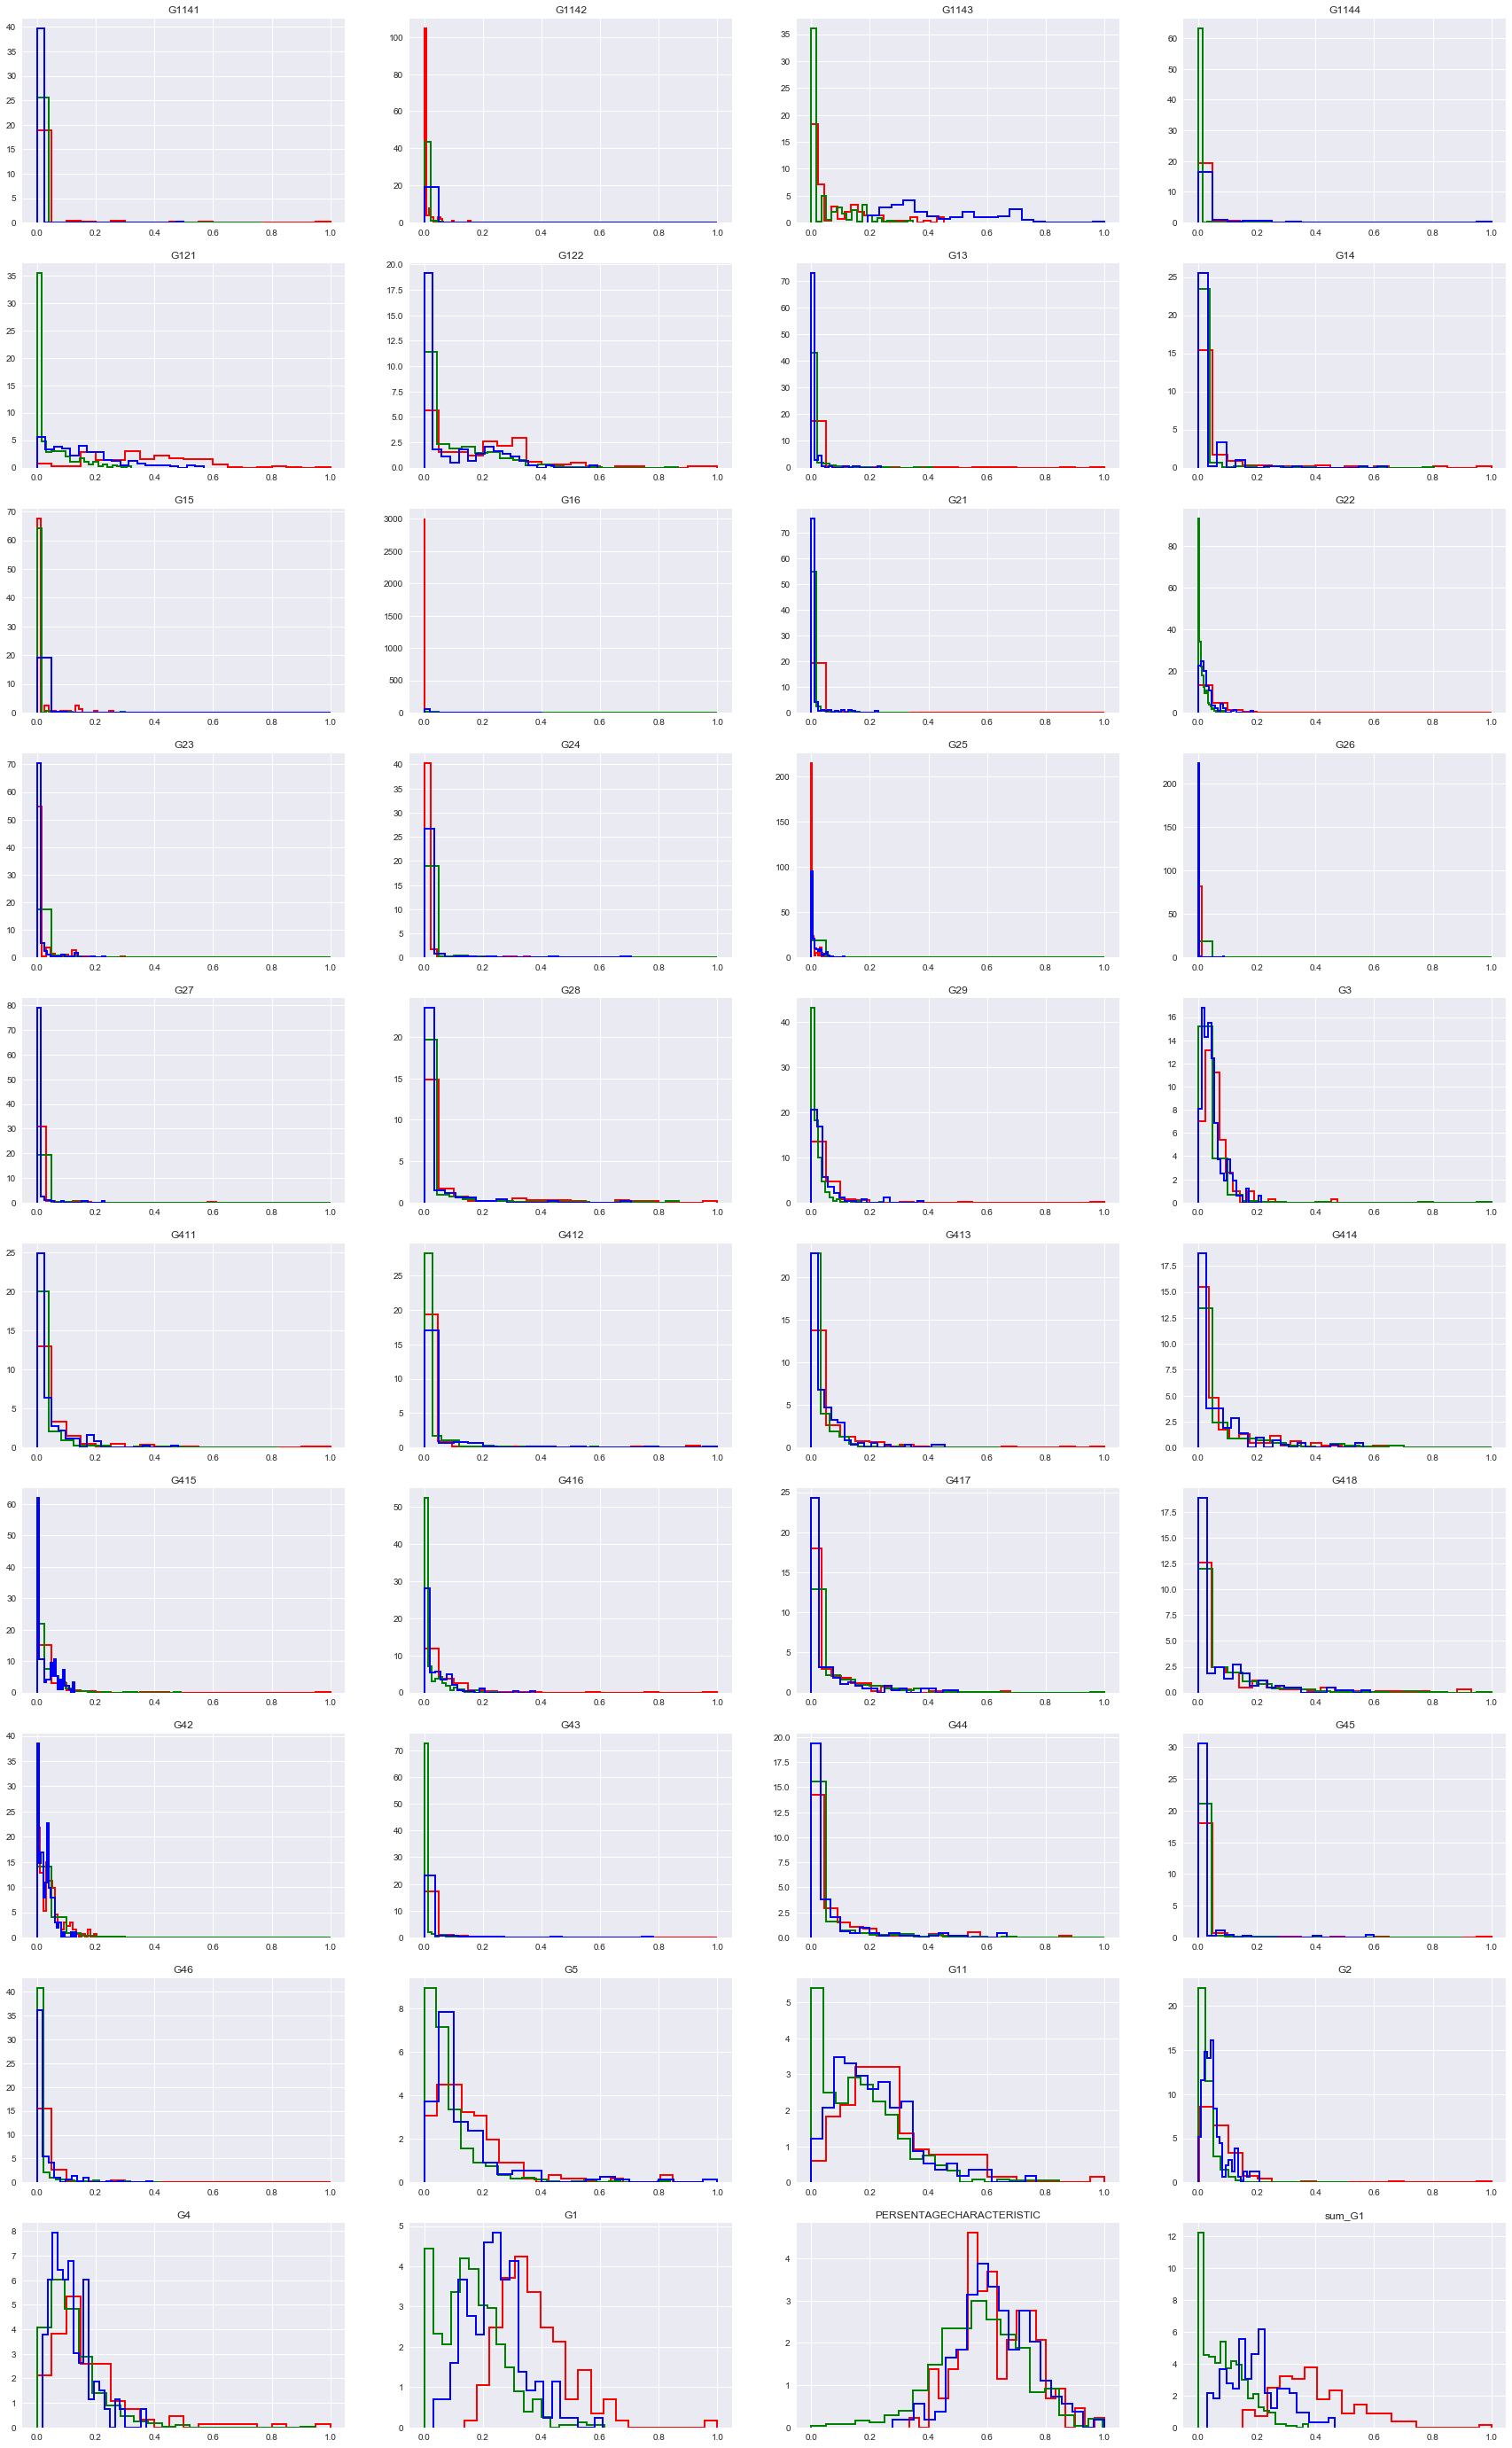

In [24]:
import math
n_col_sub_plot = 4
n_row_sub_plot = int(math.ceil(float(len(list(n_dat)))/n_col_sub_plot))
fig = plt.figure(figsize=(30, 50))
cluster_color = ['r','g','b']
for col in list(n_p_dat):
    plt.subplot(n_row_sub_plot,n_col_sub_plot,list(n_dat).index(col)+1)
    for k_number in range(0,number_of_k):
        plt.hist(cluster_n_p[k_number][col], bins=20, histtype='step' , normed=True ,linewidth=2.0  , color=cluster_color[k_number])
    plt.title(col)
plt.show()

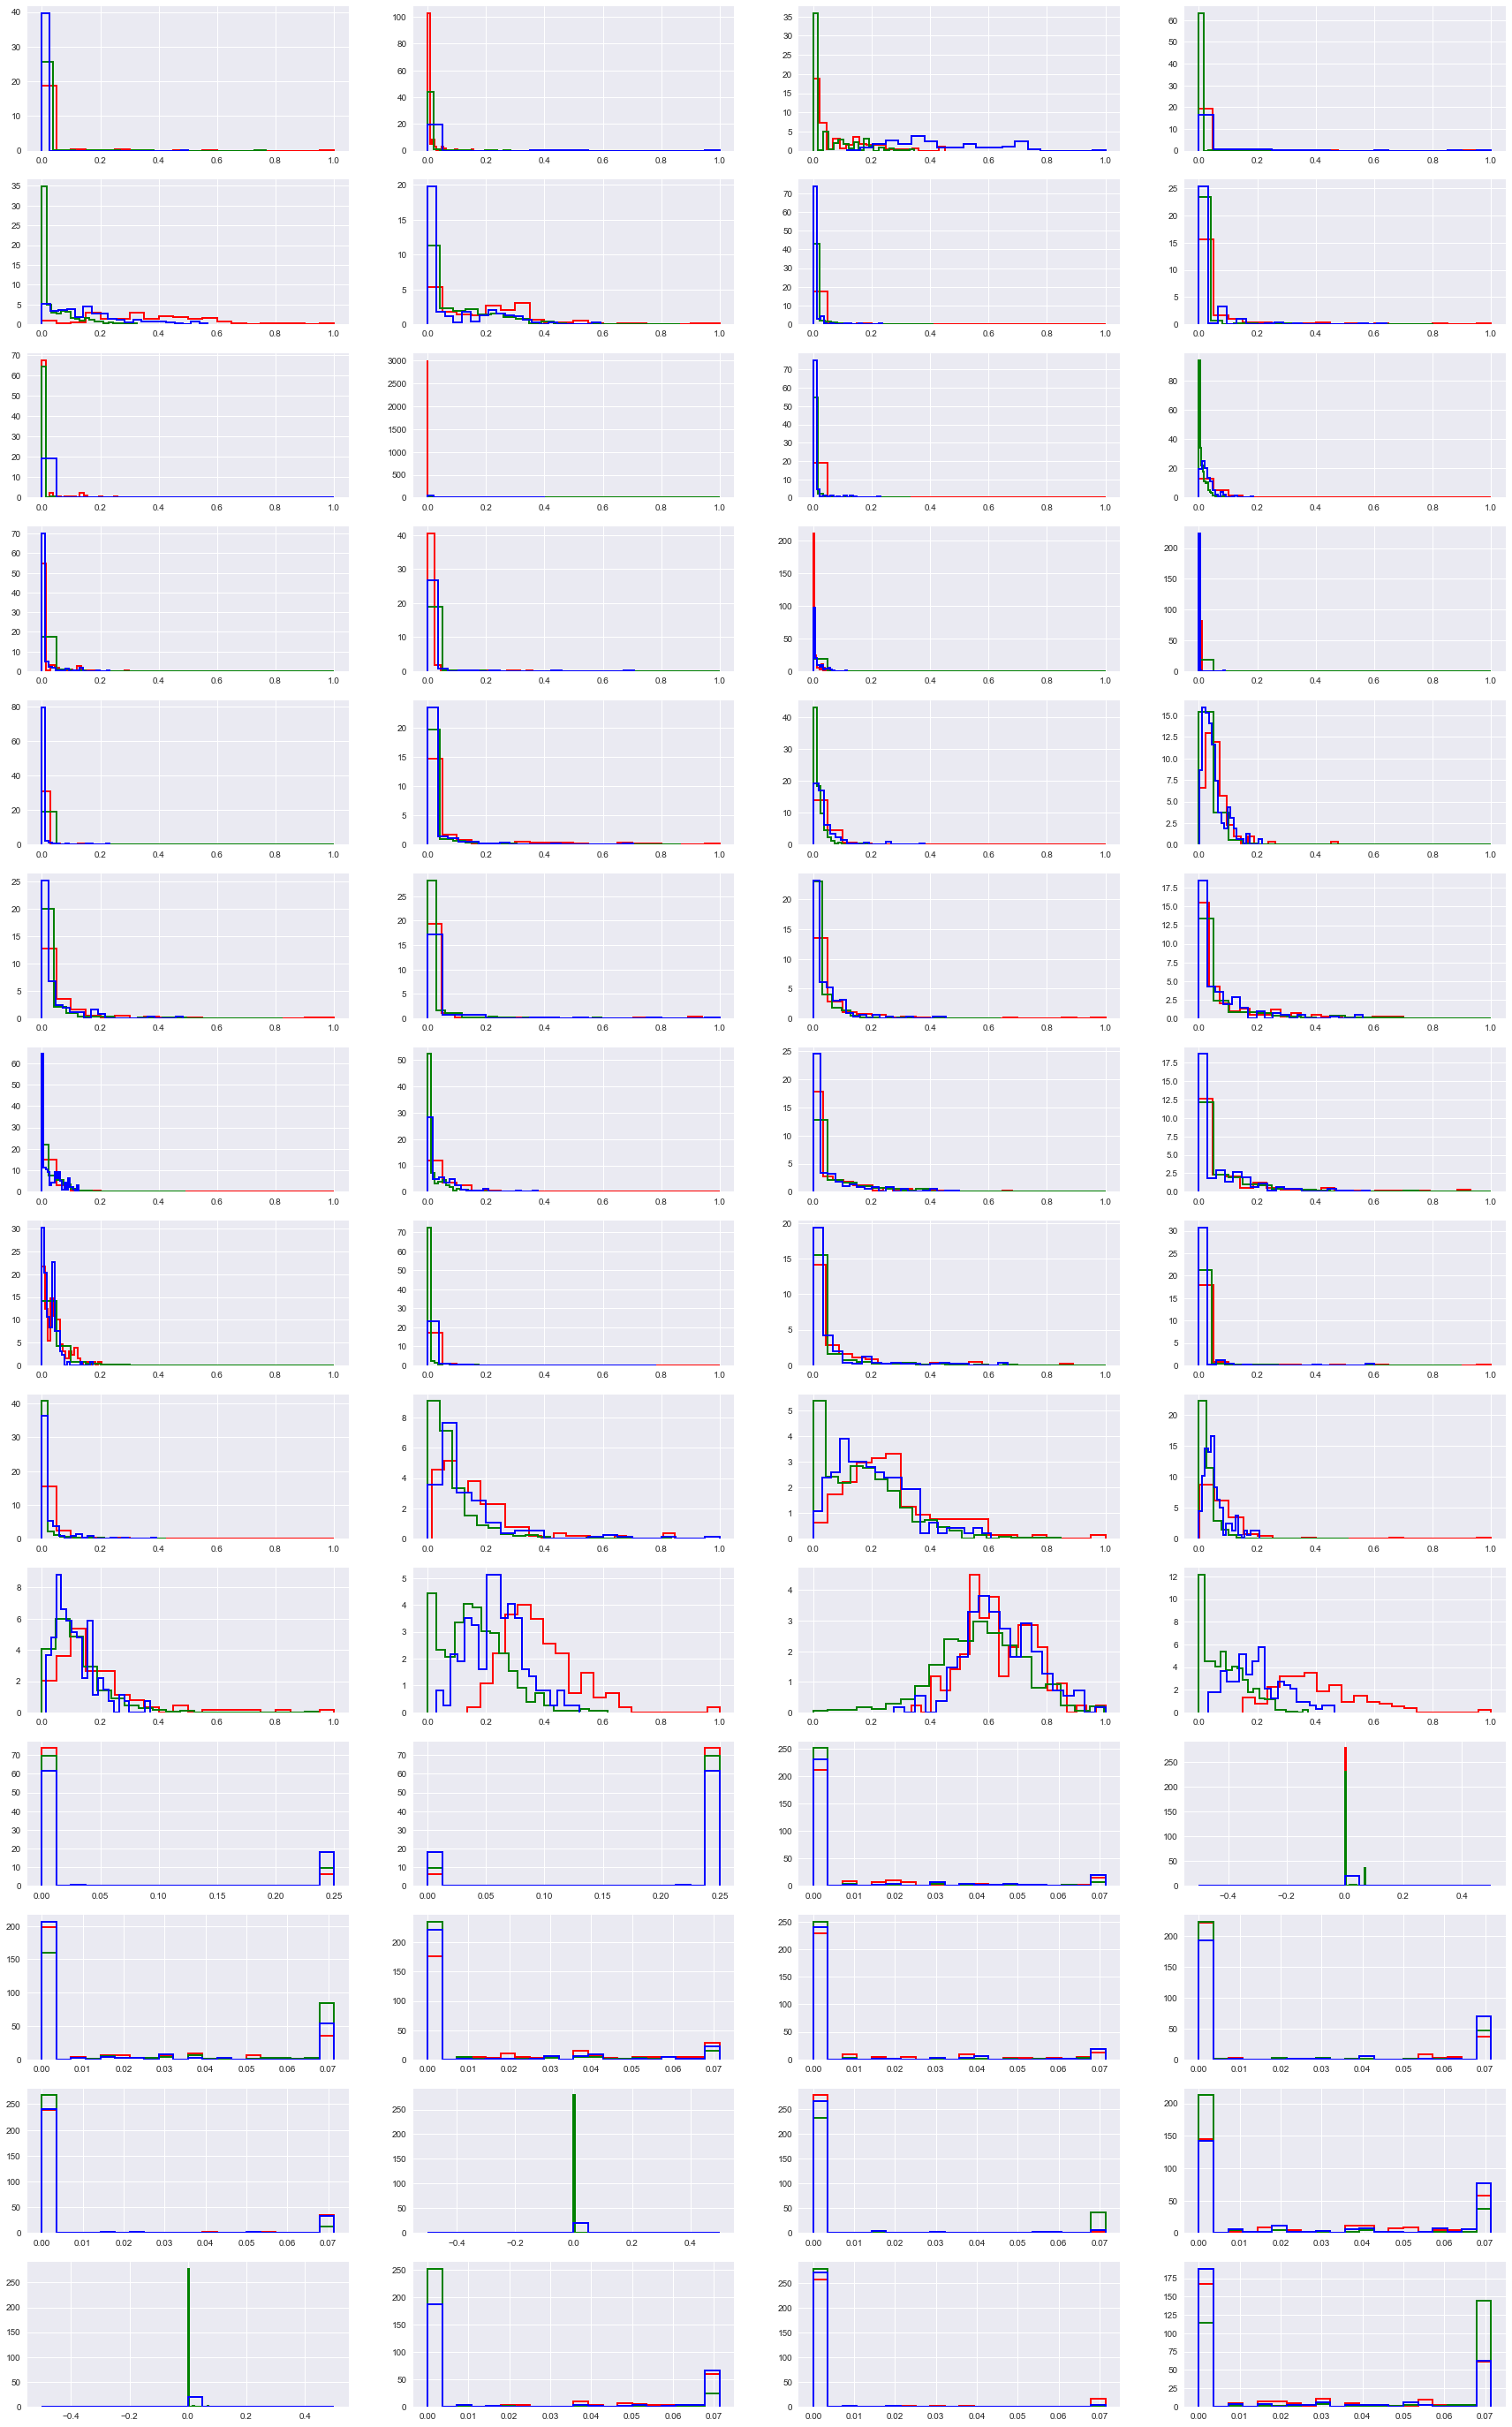

In [25]:
import math
n_col_sub_plot = 4
n_row_sub_plot = int(math.ceil(float(len(list(n_c_p_dat)))/n_col_sub_plot))
fig = plt.figure(figsize=(30, 50))
cluster_color = ['r','g','b']
number = 1
for col in list(n_c_p_dat):
    plt.subplot(n_row_sub_plot,n_col_sub_plot,number)
    number = number+1
    for k_number in range(0,number_of_k):
        plt.hist(cluster_n_c_p[k_number][col], bins=20, histtype='step' , normed=True ,linewidth=2.0  , color=cluster_color[k_number])
        plt.title(col)
plt.show()

# Regression with GPA

In [26]:
def regression(input_data):
    attributes = input_data.copy()
#     del attributes['EMPLOYEEID_DEMO']
    del attributes['GPA']
    attributes_scaled = scale_data(attributes,input_data.min(),input_data.max())
    labels = input_data['GPA'].copy()
    # Create linear regression object
    regr = sklearn.linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(attributes_scaled,labels)
    dat = []
    dat.append(regr.coef_)
    coef = pd.DataFrame(dat, columns=list(attributes))
    return coef,regr.coef_

In [27]:
n_dat['GRADES'] = dat_g['GRADES']

In [28]:
def convert_GRADE_to_GPA (row):
    if row['GRADES'] == 'A':
        return 4.00
    elif row['GRADES'] == 'B+':
        return 3.50
    elif row['GRADES'] == 'B':
        return 3.00
    elif row['GRADES'] == 'C+':
        return 2.50
    else:
        return 2.00

In [29]:
n_dat['GPA'] = n_dat.apply (lambda row: convert_GRADE_to_GPA(row),axis=1)

In [33]:
import sklearn
regr = sklearn.linear_model.LinearRegression()
n_dat.head()

G1141  G1142     G1143  G1144  G121      G122       G13  G14  G15  G16  \
3165    0.0    0.0  0.142857    0.0   0.0  0.232848  0.275591  0.0  0.0  0.0   
3166    0.0    0.0  0.000000    0.0   0.0  0.000000  0.000000  0.0  0.0  0.0   
3167    0.0    0.0  0.000000    0.0   0.0  0.000000  0.000000  0.0  0.0  0.0   
3168    0.0    0.0  0.000000    0.0   0.0  0.000000  0.000000  0.0  0.0  0.0   
3169    0.0    0.0  0.285714    0.0   0.0  0.000000  0.000000  0.0  0.0  0.0   

     ...   G46        G5       G11        G2        G4        G1  \
3165 ...   0.0  0.006447  0.000000  0.019210  0.096899  0.093419   
3166 ...   0.0  0.041264  0.196698  0.005954  0.104651  0.092708   
3167 ...   0.0  0.020374  0.144150  0.003302  0.063953  0.067941   
3168 ...   0.0  0.000000  0.147503  0.000000  0.127907  0.069521   
3169 ...   0.0  0.000000  0.000000  0.000000  0.000000  0.007900   

      PERSENTAGECHARACTERISTIC    sum_G1  GRADES  GPA  
3165                  0.702128  0.103162       B  3.0  
3166                  0.787234  0.000000       A  4.0  
3167                  0.744681  0.000000      B+  3.5  
3168                  0.680851  0.000000      B+  3.5  
3169                  0.723404  0.008724       B  3.0  

[5 rows x 42 columns]

In [42]:
attr = n_dat.copy()
del attr['GPA']
del attr['sum_G1']
del attr['GRADES']
del attr['G1']
del attr['G2']
del attr['G4']
labels = n_dat['GPA']
regr.fit(attr,labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
regr.coef_

array([-0.17756346,  0.20106935,  0.05778321,  0.19955676,  1.82889099,
        0.35437995,  0.10158432,  0.13289238,  0.13115479,  0.23636146,
        0.65474984,  2.13027103,  0.30829785,  0.67949138,  1.03281834,
        0.43242276,  0.20146025,  0.38577631,  0.44516393,  1.31163486,
        0.40163703,  0.04200206,  0.25176723,  0.14297001,  0.54041762,
       -0.08430526,  0.54117523,  0.33871754,  0.99983618, -0.40566372,
       -0.0515729 ,  0.12175025,  0.091257  ,  0.98414232,  0.52698088,
        1.17166124])

In [44]:
dat = []
dat.append(regr.coef_)
coef = pd.DataFrame(dat, columns=list(attr))

In [45]:
coef.sort_values(by=0, ascending=False, axis=1)

G22      G121        G3  PERSENTAGECHARACTERISTIC       G25       G42  \
0  2.130271  1.828891  1.311635                  1.171661  1.032818  0.999836   

         G5       G24      G21      G417    ...          G15      G45  \
0  0.984142  0.679491  0.65475  0.541175    ...     0.131155  0.12175   

        G13       G46     G1143      G412       G44      G416     G1141  \
0  0.101584  0.091257  0.057783  0.042002 -0.051573 -0.084305 -0.177563   

        G43  
0 -0.405664  

[1 rows x 36 columns]

In [46]:
list(coef.sort_values(by=0, ascending=False, axis=1))

['G22',
 'G121',
 'G3',
 'PERSENTAGECHARACTERISTIC',
 'G25',
 'G42',
 'G5',
 'G24',
 'G21',
 'G417',
 'G415',
 'G11',
 'G29',
 'G26',
 'G411',
 'G28',
 'G122',
 'G418',
 'G23',
 'G413',
 'G16',
 'G27',
 'G1142',
 'G1144',
 'G414',
 'G14',
 'G15',
 'G45',
 'G13',
 'G46',
 'G1143',
 'G412',
 'G44',
 'G416',
 'G1141',
 'G43']